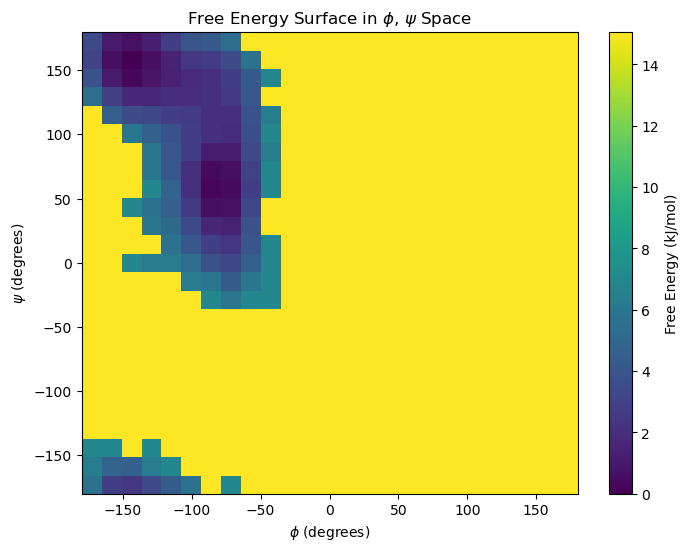

In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

# Replace 'output.trr' and 'adp.gro' with the full paths if needed
traj = md.load('/home/ndv3235/comp-lab-class-2024/Week5-ParallelTempering/Inputs/output.trr', top='/home/ndv3235/comp-lab-class-2024/Week5-ParallelTempering/Inputs/adp.gro')


# Compute phi and psi angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert angles from radians to degrees
phi_angles_deg = np.degrees(phi_angles[:, 0])
psi_angles_deg = np.degrees(psi_angles[:, 0])

# Define the function to compute and plot the FES
def plot_fes(traj, num_bins=25):
    # Compute phi and psi angles again within the function scope
    phi_indices, phi_angles = md.compute_phi(traj)
    psi_indices, psi_angles = md.compute_psi(traj)
    phi_angles_deg = np.degrees(phi_angles[:, 0])
    psi_angles_deg = np.degrees(psi_angles[:, 0])
   
    # Calculate 2D histogram
    hist, x_edges, y_edges = np.histogram2d(phi_angles_deg, psi_angles_deg, bins=num_bins,
                                            range=[[-180, 180], [-180, 180]], density=True)

    # Calculate the free energy surface
    free_energy = -np.log(hist + 1e-10)  # Avoid log(0) by adding a small value
    free_energy -= free_energy.min()  # Normalize by subtracting the minimum

    # Generate bin centers for plotting
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2

    # Plot using imshow with appropriate orientation
    plt.figure(figsize=(8, 6))
    plt.imshow(free_energy.T, origin='lower', extent=[-180, 180, -180, 180], aspect='auto', cmap='viridis')
    plt.colorbar(label='Free Energy (kJ/mol)')
    plt.xlabel(r'$\phi$ (degrees)')
    plt.ylabel(r'$\psi$ (degrees)')
    plt.title('Free Energy Surface in $\phi$, $\psi$ Space')
    plt.show()

    return free_energy, x_centers, y_centers

# Call the function
fes, phi_centers, psi_centers = plot_fes(traj)